In [4]:
import serial
import csv
import time
from datetime import datetime
from openpyxl import Workbook, load_workbook

# Configura a porta serial e a taxa de transmissão
port = 'COM11'  # Substitua pela porta correta do seu Arduino
baud_rate = 9600

ser = None
file_name = 'calibracao_dados_arduino.xlsx'  # Nome do arquivo Excel

try:
    # Abre a conexão com a porta serial
    ser = serial.Serial(port, baud_rate)
    time.sleep(2)  # Espera o Arduino inicializar

    # Tenta carregar o arquivo Excel existente ou cria um novo
    try:
        wb = load_workbook(file_name)
        # Determina o próximo índice de aba
        sheet_index = len(wb.sheetnames) + 1
    except FileNotFoundError:
        wb = Workbook()
        sheet_index = 1

    # Cria uma nova aba para a rodada de teste atual
    sheet_name = f'Teste_{sheet_index}'
    ws = wb.create_sheet(title=sheet_name)
    ws.append(['Hora', 'Temperatura'])  # Cabeçalho da nova aba

    print(f"Conectado à porta {port}. Começando a coleta de dados...")

    while True:
        try:
            # Lê dados da porta serial
            line = ser.readline().decode('utf-8').strip()
            if line:
                parts = line.split(',')
                if len(parts) == 2:
                    temperatura = parts[0].split(':')[1].strip()
                    hora_atual = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                    # Escreve os dados na aba do arquivo Excel
                    ws.append([hora_atual, temperatura])
                    print(f"Temperatura: {temperatura}, Hora: {hora_atual}")
        except Exception as e:
            print(f"Erro ao ler dados: {e}")

except serial.SerialException as e:
    print(f"Erro ao abrir a porta serial: {e}")

finally:
    # Salva o arquivo Excel
    wb.save(file_name)
    if ser and ser.is_open:
        ser.close()


Conectado à porta COM11. Começando a coleta de dados...


KeyboardInterrupt: 

In [3]:
import serial
import csv
import time
from datetime import datetime
from openpyxl import Workbook, load_workbook

# Configura a porta serial e a taxa de transmissão
port = 'COM11'  # Substitua pela porta correta do seu Arduino
baud_rate = 9600

ser = None
file_name = 'dados_arduino.xlsx'  # Nome do arquivo Excel

try:
    # Abre a conexão com a porta serial
    ser = serial.Serial(port, baud_rate)
    time.sleep(2)  # Espera o Arduino inicializar

    # Tenta carregar o arquivo Excel existente ou cria um novo
    try:
        wb = load_workbook(file_name)
        # Determina o próximo índice de aba
        sheet_index = len(wb.sheetnames) + 1
    except FileNotFoundError:
        wb = Workbook()
        sheet_index = 1

    # Cria uma nova aba para a rodada de teste atual
    sheet_name = f'Teste_{sheet_index}'
    ws = wb.create_sheet(title=sheet_name)
    ws.append(['Hora', 'Temperatura'])  # Cabeçalho da nova aba

    print(f"Conectado à porta {port}. Começando a coleta de dados...")

    while True:
        try:
            # Lê dados da porta serial
            line = ser.readline().decode('utf-8').strip()
            if line:
                parts = line.split(',')
                if len(parts) == 2:
                    temperatura = parts[0].split(':')[1].strip()
                    hora_atual = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                    # Escreve os dados na aba do arquivo Excel
                    ws.append([hora_atual, temperatura])
                    print(f"Temperatura: {temperatura}, Hora: {hora_atual}")
        except Exception as e:
            print(f"Erro ao ler dados: {e}")

except serial.SerialException as e:
    print(f"Erro ao abrir a porta serial: {e}")

finally:
    # Salva o arquivo Excel
    wb.save(file_name)
    if ser and ser.is_open:
        ser.close()


Conectado à porta COM11. Começando a coleta de dados...


KeyboardInterrupt: 

In [ ]:
import serial
import csv
import time
from datetime import datetime
from openpyxl import Workbook, load_workbook

# Configura a porta serial e a taxa de transmissão
port = 'COM11'  # Substitua pela porta correta do seu Arduino
baud_rate = 9600

ser = None
file_name = 'calibracao_dados_arduino.xlsx'  # Nome do arquivo Excel

try:
    # Abre a conexão com a porta serial
    ser = serial.Serial(port, baud_rate)
    time.sleep(2)  # Espera o Arduino inicializar

    # Tenta carregar o arquivo Excel existente ou cria um novo
    try:
        wb = load_workbook(file_name)
        # Determina o próximo índice de aba
        sheet_index = len(wb.sheetnames) + 1
    except FileNotFoundError:
        wb = Workbook()
        sheet_index = 1

    # Cria uma nova aba para a rodada de teste atual
    sheet_name = f'Teste_{sheet_index}'
    ws = wb.create_sheet(title=sheet_name)
    # Cabeçalho para as colunas de tempo, temperatura MAX6675 e NTC 10k
    ws.append(['Hora', 'Temperatura MAX6675 (C)', 'Temperatura NTC 10k (C)'])

    print(f"Conectado à porta {port}. Começando a coleta de dados...")

    while True:
        try:
            # Lê dados da porta serial
            line = ser.readline().decode('utf-8').strip()
            if line:
                parts = line.split(',')
                if len(parts) == 2:
                    # Extrai as duas temperaturas recebidas do Arduino
                    temp_max6675 = parts[0].split(':')[1].strip()  # Temperatura do MAX6675
                    temp_ntc = parts[1].split(':')[1].strip()      # Temperatura do NTC 10k
                    hora_atual = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                    
                    # Escreve os dados na aba do arquivo Excel
                    ws.append([hora_atual, temp_max6675, temp_ntc])
                    print(f"Hora: {hora_atual}, Temp MAX6675: {temp_max6675} C, Temp NTC: {temp_ntc} C")
        except Exception as e:
            print(f"Erro ao ler dados: {e}")

except serial.SerialException as e:
    print(f"Erro ao abrir a porta serial: {e}")

finally:
    # Salva o arquivo Excel
    wb.save(file_name)
    if ser and ser.is_open:
        ser.close()
 

In [12]:
import serial
import time
from datetime import datetime
from openpyxl import Workbook, load_workbook

# Configura a porta serial e a taxa de transmissão
port = 'COM11'  # Substitua pela porta correta do seu Arduino
baud_rate = 9600

ser = None
file_name = 'datalogger_temperatura.xlsx'  # Nome do arquivo Excel

try:
    # Abre a conexão com a porta serial
    ser = serial.Serial(port, baud_rate)
    time.sleep(2)  # Espera o Arduino inicializar

    # Tenta carregar o arquivo Excel existente ou cria um novo
    try:
        wb = load_workbook(file_name)
    except FileNotFoundError:
        wb = Workbook()

    # Cria uma nova aba com a data atual como nome
    data_atual = datetime.now().strftime('%Y-%m-%d' '%H'%M:%S')  # Nome da aba com a data
    ws = wb.create_sheet(title=data_atual)
    
    # Cabeçalho para as colunas: Hora no eixo X e Temperaturas nas colunas seguintes
    ws.append(['Hora', 'Temp. In (C)', 'Temp. Out 10k (C)'])

    print(f"Conectado à porta {port}. Começando a coleta de dados...")
    print(f"Data e Hora do Inicio: {data_atual}")

    while True:
        try:
            # Lê dados da porta serial
            line = ser.readline().decode('utf-8').strip()
            if line:
                parts = line.split(',')
                if len(parts) == 2:
                    # Extrai as duas temperaturas recebidas do Arduino
                    temp_max6675 = parts[0].split(':')[1].strip()  # Temperatura do MAX6675
                    temp_ntc = parts[1].split(':')[1].strip()      # Temperatura do NTC 10k
                    hora_atual = datetime.now().strftime('%M:%S')  # Hora atual no formato MM:SS
                    
                    # Escreve os dados na aba do arquivo Excel
                    ws.append([hora_atual, temp_max6675, temp_ntc])
                    print(f"Hora: {hora_atual}, Temp In: {temp_max6675}, Temp Out: {temp_ntc}")
        except Exception as e:
            print(f"Erro ao ler dados: {e}")

except serial.SerialException as e:
    print(f"Erro ao abrir a porta serial: {e}")

finally:
    # Salva o arquivo Excel
    wb.save(file_name)
    if ser and ser.is_open:
        ser.close()


SyntaxError: invalid syntax (3911080238.py, line 25)

ESSE AQUI 

In [6]:
import serial
import time
from datetime import datetime
from openpyxl import Workbook, load_workbook

# Configura a porta serial e a taxa de transmissão
port = 'COM11'  # Substitua pela porta correta do seu Arduino
baud_rate = 9600

ser = None
file_name = 'calibracao_dados_arduino.xlsx'  # Nome do arquivo Excel

try:
    # Abre a conexão com a porta serial
    ser = serial.Serial(port, baud_rate)
    time.sleep(2)  # Espera o Arduino inicializar

    # Tenta carregar o arquivo Excel existente ou cria um novo
    try:
        wb = load_workbook(file_name)
        # Determina o próximo índice de aba
        sheet_index = len(wb.sheetnames) + 1
    except FileNotFoundError:
        wb = Workbook()
        sheet_index = 1

    # Cria uma nova aba para a rodada de teste atual
    sheet_name = f'Teste_{sheet_index}'
    ws = wb.create_sheet(title=sheet_name)
    # Cabeçalho para as colunas de tempo, temperatura MAX6675 e NTC 10k
    ws.append(['Hora', 'Temperatura Bruta (C)', 'Temperatura Corrigida (C)', 'Temperatura Ambiente (C)'])

    print(f"Conectado à porta {port}. Começando a coleta de dados...")

    while True:
        try:
            # Lê dados da porta serial
            line = ser.readline().decode('utf-8').strip()
            if line:
                # Supondo que a linha tenha este formato:
                # Temp. Bruta: 25.0 C, Temp. Corrigida: 20.0 C, Temp. Ambiente: 22.0 C
                if "Temp. Bruta" in line:
                    print(f"Recebido: {line}")
                    parts = line.split(',')
                    # Extrai as temperaturas
                    temp_bruta = parts[0].split(':')[1].strip().split()[0]  # Temperatura Bruta
                    temp_corrigida = parts[1].split(':')[1].strip().split()[0]  # Temperatura Corrigida
                    temp_ambiente = parts[2].split(':')[1].strip().split()[0]  # Temperatura Ambiente
                    hora_atual = datetime.now().strftime('%Y-%m-%d %H:%M')  # Formato de hora sem segundos
                    
                    # Escreve os dados na aba do arquivo Excel
                    ws.append([hora_atual, temp_bruta, temp_corrigida, temp_ambiente])
                    print(f"Hora: {hora_atual}, Temp Bruta: {temp_bruta} C, Temp Corrigida: {temp_corrigida} C, Temp Ambiente: {temp_ambiente} C")
        except Exception as e:
            print(f"Erro ao ler dados: {e}")

except serial.SerialException as e:
    print(f"Erro ao abrir a porta serial: {e}")

finally:
    # Salva o arquivo Excel
    wb.save(file_name)
    if ser and ser.is_open:
        ser.close()


Erro ao abrir a porta serial: could not open port 'COM11': PermissionError(13, 'Acesso negado.', None, 5)


PermissionError: [Errno 13] Permission denied: 'calibracao_dados_arduino.xlsx'

In [2]:
import serial
import time
from datetime import datetime
from openpyxl import Workbook, load_workbook

# Configura a porta serial e a taxa de transmissão
port = 'COM11'  # Substitua pela porta correta do seu Arduino
baud_rate = 9600

ser = None
file_name = 'calibracao_dados_arduino.xlsx'  # Nome do arquivo Excel

try:
    # Abre a conexão com a porta serial
    ser = serial.Serial(port, baud_rate)
    time.sleep(2)  # Espera o Arduino inicializar

    # Tenta carregar o arquivo Excel existente ou cria um novo
    try:
        wb = load_workbook(file_name)
        # Determina o próximo índice de aba
        sheet_index = len(wb.sheetnames) + 1
    except FileNotFoundError:
        wb = Workbook()
        sheet_index = 1

    # Cria uma nova aba para a rodada de teste atual
    sheet_name = f'Teste_{sheet_index}'
    ws = wb.create_sheet(title=sheet_name)
    
    # Cabeçalho para as colunas de Data, Hora, Temperatura Bruta, Temperatura Corrigida e Temperatura Ambiente
    ws.append(['Data', 'Hora', 'Temperatura Bruta (C)', 'Temperatura Corrigida (C)', 'Temperatura Ambiente (C)'])

    print(f"Conectado à porta {port}. Começando a coleta de dados...")

    while True:
        try:
            # Lê dados da porta serial
            line = ser.readline().decode('utf-8').strip()
            if line:
                # Supondo que a linha tenha este formato:
                # Temp. Bruta: 25.0 C, Temp. Corrigida: 20.0 C, Temp. Ambiente: 22.0 C
                if "Temp. Bruta" in line:
                    print(f"Recebido: {line}")
                    parts = line.split(',')
                    # Extrai as temperaturas
                    temp_bruta = parts[0].split(':')[1].strip().split()[0]  # Temperatura Bruta
                    temp_corrigida = parts[1].split(':')[1].strip().split()[0]  # Temperatura Corrigida
                    temp_ambiente = parts[2].split(':')[1].strip().split()[0]  # Temperatura Ambiente
                    
                    # Obtém a data e a hora (sem segundos)
                    data_atual = datetime.now().strftime('%Y-%m-%d')  # Formato da data
                    hora_atual = datetime.now().strftime('%H:%M')     # Formato da hora sem segundos
                    
                    # Escreve os dados na aba do arquivo Excel
                    ws.append([data_atual, hora_atual, temp_bruta, temp_corrigida, temp_ambiente])
                    
                    # Exibe os dados no terminal
                    print(f"Data: {data_atual}, Hora: {hora_atual}, Temp Bruta: {temp_bruta} C, Temp Corrigida: {temp_corrigida} C, Temp Ambiente: {temp_ambiente} C")
        except Exception as e:
            print(f"Erro ao ler dados: {e}")

except serial.SerialException as e:
    print(f"Erro ao abrir a porta serial: {e}")

finally:
    # Salva o arquivo Excel
    wb.save(file_name)
    if ser and ser.is_open:
        ser.close()


Conectado à porta COM11. Começando a coleta de dados...
Recebido: Temp. Bruta: 0.00 C, Temp. Corrigida: -2.23 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:27, Temp Bruta: 0.00 C, Temp Corrigida: -2.23 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 62.50 C, Temp. Corrigida: 56.39 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:27, Temp Bruta: 62.50 C, Temp Corrigida: 56.39 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 63.25 C, Temp. Corrigida: 57.10 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:27, Temp Bruta: 63.25 C, Temp Corrigida: 57.10 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 63.00 C, Temp. Corrigida: 56.86 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:27, Temp Bruta: 63.00 C, Temp Corrigida: 56.86 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 63.00 C, Temp. Corrigida: 56.86 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:27, Temp Bruta: 63.00 C, Temp Corrigida: 56.86 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 63.25 C, Temp

Recebido: Temp. Bruta: 65.00 C, Temp. Corrigida: 58.74 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:27, Temp Bruta: 65.00 C, Temp Corrigida: 58.74 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 64.50 C, Temp. Corrigida: 58.27 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:27, Temp Bruta: 64.50 C, Temp Corrigida: 58.27 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 64.50 C, Temp. Corrigida: 58.27 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:27, Temp Bruta: 64.50 C, Temp Corrigida: 58.27 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 64.75 C, Temp. Corrigida: 58.50 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:27, Temp Bruta: 64.75 C, Temp Corrigida: 58.50 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 65.25 C, Temp. Corrigida: 58.97 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:27, Temp Bruta: 65.25 C, Temp Corrigida: 58.97 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 64.75 C, Temp. Corrigida: 58.50 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 65.50 C, Temp. Corrigida: 59.21 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:27, Temp Bruta: 65.50 C, Temp Corrigida: 59.21 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 65.00 C, Temp. Corrigida: 58.74 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:27, Temp Bruta: 65.00 C, Temp Corrigida: 58.74 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 65.00 C, Temp. Corrigida: 58.74 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:27, Temp Bruta: 65.00 C, Temp Corrigida: 58.74 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 65.00 C, Temp. Corrigida: 58.74 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:27, Temp Bruta: 65.00 C, Temp Corrigida: 58.74 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 65.50 C, Temp. Corrigida: 59.21 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:27, Temp Bruta: 65.50 C, Temp Corrigida: 59.21 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 65.25 C, Temp. Corrigida: 58.97 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 66.00 C, Temp. Corrigida: 59.68 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 66.00 C, Temp Corrigida: 59.68 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 66.00 C, Temp. Corrigida: 59.68 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 66.00 C, Temp Corrigida: 59.68 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 66.00 C, Temp. Corrigida: 59.68 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 66.00 C, Temp Corrigida: 59.68 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 66.25 C, Temp. Corrigida: 59.91 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 66.25 C, Temp Corrigida: 59.91 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 66.25 C, Temp. Corrigida: 59.91 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 66.25 C, Temp Corrigida: 59.91 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 66.50 C, Temp. Corrigida: 60.14 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 66.75 C, Temp. Corrigida: 60.38 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 66.75 C, Temp Corrigida: 60.38 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 67.00 C, Temp. Corrigida: 60.61 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 67.00 C, Temp Corrigida: 60.61 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 66.25 C, Temp. Corrigida: 59.91 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 66.25 C, Temp Corrigida: 59.91 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 66.50 C, Temp. Corrigida: 60.14 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 66.50 C, Temp Corrigida: 60.14 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 66.50 C, Temp. Corrigida: 60.14 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 66.50 C, Temp Corrigida: 60.14 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 66.75 C, Temp. Corrigida: 60.38 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 66.75 C, Temp. Corrigida: 60.38 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 66.75 C, Temp Corrigida: 60.38 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 67.25 C, Temp. Corrigida: 60.85 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 67.25 C, Temp Corrigida: 60.85 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 66.75 C, Temp. Corrigida: 60.38 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 66.75 C, Temp Corrigida: 60.38 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 66.50 C, Temp. Corrigida: 60.14 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 66.50 C, Temp Corrigida: 60.14 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 66.50 C, Temp. Corrigida: 60.14 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 66.50 C, Temp Corrigida: 60.14 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 67.25 C, Temp. Corrigida: 60.85 C, Temp. Ambiente: 36.66 C
Data: 20

Data: 2024-10-25, Hora: 15:28, Temp Bruta: 67.75 C, Temp Corrigida: 61.32 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 67.50 C, Temp. Corrigida: 61.08 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 67.50 C, Temp Corrigida: 61.08 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 67.25 C, Temp. Corrigida: 60.85 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 67.25 C, Temp Corrigida: 60.85 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 67.50 C, Temp. Corrigida: 61.08 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 67.50 C, Temp Corrigida: 61.08 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 67.00 C, Temp. Corrigida: 60.61 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 67.00 C, Temp Corrigida: 60.61 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 67.50 C, Temp. Corrigida: 61.08 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 67.50 C, Temp Corrigida: 61.08 C, Temp Ambiente

Data: 2024-10-25, Hora: 15:28, Temp Bruta: 67.75 C, Temp Corrigida: 61.32 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 67.25 C, Temp. Corrigida: 60.85 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 67.25 C, Temp Corrigida: 60.85 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 68.00 C, Temp. Corrigida: 61.55 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 68.00 C, Temp Corrigida: 61.55 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 67.50 C, Temp. Corrigida: 61.08 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 67.50 C, Temp Corrigida: 61.08 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 68.00 C, Temp. Corrigida: 61.55 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 68.00 C, Temp Corrigida: 61.55 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 68.00 C, Temp. Corrigida: 61.55 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 68.00 C, Temp Corrigida: 61.55 C, Temp Ambiente

Recebido: Temp. Bruta: 68.50 C, Temp. Corrigida: 62.02 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 68.50 C, Temp Corrigida: 62.02 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 68.50 C, Temp. Corrigida: 62.02 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 68.50 C, Temp Corrigida: 62.02 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 68.50 C, Temp. Corrigida: 62.02 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 68.50 C, Temp Corrigida: 62.02 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 68.00 C, Temp. Corrigida: 61.55 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 68.00 C, Temp Corrigida: 61.55 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 68.50 C, Temp. Corrigida: 62.02 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:28, Temp Bruta: 68.50 C, Temp Corrigida: 62.02 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 68.50 C, Temp. Corrigida: 62.02 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 68.50 C, Temp. Corrigida: 62.02 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 68.50 C, Temp Corrigida: 62.02 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 69.00 C, Temp. Corrigida: 62.49 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 69.00 C, Temp Corrigida: 62.49 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 69.25 C, Temp. Corrigida: 62.72 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 69.25 C, Temp Corrigida: 62.72 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 68.75 C, Temp. Corrigida: 62.25 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 68.75 C, Temp Corrigida: 62.25 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 69.25 C, Temp. Corrigida: 62.72 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 69.25 C, Temp Corrigida: 62.72 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 69.00 C, Temp. Corrigida: 62.49 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 69.25 C, Temp. Corrigida: 62.72 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 69.25 C, Temp Corrigida: 62.72 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 68.75 C, Temp. Corrigida: 62.25 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 68.75 C, Temp Corrigida: 62.25 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 69.25 C, Temp. Corrigida: 62.72 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 69.25 C, Temp Corrigida: 62.72 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 69.25 C, Temp. Corrigida: 62.72 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 69.25 C, Temp Corrigida: 62.72 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 69.00 C, Temp. Corrigida: 62.49 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 69.00 C, Temp Corrigida: 62.49 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 69.50 C, Temp. Corrigida: 62.96 C, Temp. Ambiente: 35.19 C
Data: 20

Recebido: Temp. Bruta: 69.75 C, Temp. Corrigida: 63.19 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 69.75 C, Temp Corrigida: 63.19 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 70.00 C, Temp. Corrigida: 63.43 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 70.00 C, Temp Corrigida: 63.43 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 69.25 C, Temp. Corrigida: 62.72 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 69.25 C, Temp Corrigida: 62.72 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 70.00 C, Temp. Corrigida: 63.43 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 70.00 C, Temp Corrigida: 63.43 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 69.25 C, Temp. Corrigida: 62.72 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 69.25 C, Temp Corrigida: 62.72 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 69.75 C, Temp. Corrigida: 63.19 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 70.50 C, Temp. Corrigida: 63.90 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 70.50 C, Temp Corrigida: 63.90 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 70.00 C, Temp. Corrigida: 63.43 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 70.00 C, Temp Corrigida: 63.43 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 70.00 C, Temp. Corrigida: 63.43 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 70.00 C, Temp Corrigida: 63.43 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 70.25 C, Temp. Corrigida: 63.66 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 70.25 C, Temp Corrigida: 63.66 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 70.25 C, Temp. Corrigida: 63.66 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 70.25 C, Temp Corrigida: 63.66 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 70.25 C, Temp. Corrigida: 63.66 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 70.25 C, Temp. Corrigida: 63.66 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 70.25 C, Temp Corrigida: 63.66 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 70.25 C, Temp. Corrigida: 63.66 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 70.25 C, Temp Corrigida: 63.66 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 70.75 C, Temp. Corrigida: 64.13 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 70.75 C, Temp Corrigida: 64.13 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 70.75 C, Temp. Corrigida: 64.13 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 70.75 C, Temp Corrigida: 64.13 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 70.25 C, Temp. Corrigida: 63.66 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 70.25 C, Temp Corrigida: 63.66 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 71.00 C, Temp. Corrigida: 64.36 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 71.25 C, Temp. Corrigida: 64.60 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 71.25 C, Temp Corrigida: 64.60 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 71.25 C, Temp. Corrigida: 64.60 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 71.25 C, Temp Corrigida: 64.60 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 70.50 C, Temp. Corrigida: 63.90 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 70.50 C, Temp Corrigida: 63.90 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 70.75 C, Temp. Corrigida: 64.13 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 70.75 C, Temp Corrigida: 64.13 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 71.25 C, Temp. Corrigida: 64.60 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 71.25 C, Temp Corrigida: 64.60 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 71.00 C, Temp. Corrigida: 64.36 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 71.50 C, Temp. Corrigida: 64.83 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 71.50 C, Temp Corrigida: 64.83 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 72.00 C, Temp. Corrigida: 65.30 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 72.00 C, Temp Corrigida: 65.30 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 71.25 C, Temp. Corrigida: 64.60 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 71.25 C, Temp Corrigida: 64.60 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 71.75 C, Temp. Corrigida: 65.07 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 71.75 C, Temp Corrigida: 65.07 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 71.75 C, Temp. Corrigida: 65.07 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:29, Temp Bruta: 71.75 C, Temp Corrigida: 65.07 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 71.50 C, Temp. Corrigida: 64.83 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 72.25 C, Temp. Corrigida: 65.54 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 72.25 C, Temp Corrigida: 65.54 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 72.00 C, Temp. Corrigida: 65.30 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 72.00 C, Temp Corrigida: 65.30 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 72.25 C, Temp. Corrigida: 65.54 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 72.25 C, Temp Corrigida: 65.54 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 72.25 C, Temp. Corrigida: 65.54 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 72.25 C, Temp Corrigida: 65.54 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 72.50 C, Temp. Corrigida: 65.77 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 72.50 C, Temp Corrigida: 65.77 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 72.25 C, Temp. Corrigida: 65.54 C, Temp. Ambiente: 34.70 C
Data: 20

Recebido: Temp. Bruta: 72.75 C, Temp. Corrigida: 66.01 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 72.75 C, Temp Corrigida: 66.01 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 72.50 C, Temp. Corrigida: 65.77 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 72.50 C, Temp Corrigida: 65.77 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 72.50 C, Temp. Corrigida: 65.77 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 72.50 C, Temp Corrigida: 65.77 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 72.50 C, Temp. Corrigida: 65.77 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 72.50 C, Temp Corrigida: 65.77 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 72.75 C, Temp. Corrigida: 66.01 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 72.75 C, Temp Corrigida: 66.01 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 72.75 C, Temp. Corrigida: 66.01 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 73.00 C, Temp. Corrigida: 66.24 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 73.00 C, Temp Corrigida: 66.24 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 72.75 C, Temp. Corrigida: 66.01 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 72.75 C, Temp Corrigida: 66.01 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 72.75 C, Temp. Corrigida: 66.01 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 72.75 C, Temp Corrigida: 66.01 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 72.50 C, Temp. Corrigida: 65.77 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 72.50 C, Temp Corrigida: 65.77 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 72.75 C, Temp. Corrigida: 66.01 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 72.75 C, Temp Corrigida: 66.01 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 73.00 C, Temp. Corrigida: 66.24 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 73.50 C, Temp. Corrigida: 66.71 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 73.50 C, Temp Corrigida: 66.71 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 73.50 C, Temp. Corrigida: 66.71 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 73.50 C, Temp Corrigida: 66.71 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 73.50 C, Temp. Corrigida: 66.71 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 73.50 C, Temp Corrigida: 66.71 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 73.25 C, Temp. Corrigida: 66.48 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 73.25 C, Temp Corrigida: 66.48 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 73.00 C, Temp. Corrigida: 66.24 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 73.00 C, Temp Corrigida: 66.24 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 73.25 C, Temp. Corrigida: 66.48 C, Temp. Ambiente: 34.70 C
Data: 20

Recebido: Temp. Bruta: 73.75 C, Temp. Corrigida: 66.94 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 73.75 C, Temp Corrigida: 66.94 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 74.00 C, Temp. Corrigida: 67.18 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 74.00 C, Temp Corrigida: 67.18 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 74.50 C, Temp. Corrigida: 67.65 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 74.50 C, Temp Corrigida: 67.65 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 74.00 C, Temp. Corrigida: 67.18 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 74.00 C, Temp Corrigida: 67.18 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 74.25 C, Temp. Corrigida: 67.41 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 74.25 C, Temp Corrigida: 67.41 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 74.25 C, Temp. Corrigida: 67.41 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 74.25 C, Temp. Corrigida: 67.41 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 74.25 C, Temp Corrigida: 67.41 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 74.75 C, Temp. Corrigida: 67.88 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 74.75 C, Temp Corrigida: 67.88 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 74.25 C, Temp. Corrigida: 67.41 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 74.25 C, Temp Corrigida: 67.41 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 74.25 C, Temp. Corrigida: 67.41 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 74.25 C, Temp Corrigida: 67.41 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 74.50 C, Temp. Corrigida: 67.65 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:30, Temp Bruta: 74.50 C, Temp Corrigida: 67.65 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 74.75 C, Temp. Corrigida: 67.88 C, Temp. Ambiente: 34.70 C
Data: 20

Recebido: Temp. Bruta: 74.75 C, Temp. Corrigida: 67.88 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 74.75 C, Temp Corrigida: 67.88 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 74.75 C, Temp. Corrigida: 67.88 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 74.75 C, Temp Corrigida: 67.88 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.00 C, Temp. Corrigida: 68.12 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 75.00 C, Temp Corrigida: 68.12 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.25 C, Temp. Corrigida: 68.35 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 75.25 C, Temp Corrigida: 68.35 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 75.50 C, Temp. Corrigida: 68.59 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 75.50 C, Temp Corrigida: 68.59 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.25 C, Temp. Corrigida: 68.35 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 75.50 C, Temp. Corrigida: 68.59 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 75.50 C, Temp Corrigida: 68.59 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.25 C, Temp. Corrigida: 68.35 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 75.25 C, Temp Corrigida: 68.35 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 75.50 C, Temp. Corrigida: 68.59 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 75.50 C, Temp Corrigida: 68.59 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 75.50 C, Temp. Corrigida: 68.59 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 75.50 C, Temp Corrigida: 68.59 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:31, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 20.53 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:32, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 81.50 C, Temp Corrigida: 74.21 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 81.50 C, Temp Corrigida: 74.21 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 81.50 C, Temp Corrigida: 74.21 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 81.75 C, Temp Corrigida: 74.45 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 81.75 C, Temp Corrigida: 74.45 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.00 C, Temp Corrigida: 74.68 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 81.75 C, Temp Corrigida: 74.45 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 81.50 C, Temp Corrigida: 74.21 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.00 C, Temp Corrigida: 74.68 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.00 C, Temp Corrigida: 74.68 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.25 C, Temp. Corrigida: 74.92 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.25 C, Temp Corrigida: 74.92 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 81.50 C, Temp Corrigida: 74.21 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.00 C, Temp Corrigida: 74.68 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.25 C, Temp. Corrigida: 74.92 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.25 C, Temp Corrigida: 74.92 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.00 C, Temp Corrigida: 74.68 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 81.75 C, Temp Corrigida: 74.45 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.25 C, Temp. Corrigida: 74.92 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.25 C, Temp Corrigida: 74.92 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 82.25 C, Temp. Corrigida: 74.92 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.25 C, Temp Corrigida: 74.92 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.25 C, Temp. Corrigida: 74.92 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:33, Temp Bruta: 82.25 C, Temp Corrigida: 74.92 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 20

Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente

Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:34, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 84.25 C, Temp. Corrigida: 76.79 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 84.25 C, Temp Corrigida: 76.79 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 84.00 C, Temp. Corrigida: 76.56 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 84.00 C, Temp Corrigida: 76.56 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 84.00 C, Temp. Corrigida: 76.56 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 84.00 C, Temp Corrigida: 76.56 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 84.00 C, Temp. Corrigida: 76.56 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 84.00 C, Temp. Corrigida: 76.56 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 84.00 C, Temp Corrigida: 76.56 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 84.00 C, Temp. Corrigida: 76.56 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 84.00 C, Temp Corrigida: 76.56 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 84.00 C, Temp. Corrigida: 76.56 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:35, Temp Bruta: 84.00 C, Temp Corrigida: 76.56 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.02 C
Data: 20

Data: 2024-10-25, Hora: 15:36, Temp Bruta: 84.00 C, Temp Corrigida: 76.56 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 84.00 C, Temp. Corrigida: 76.56 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 84.00 C, Temp Corrigida: 76.56 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 84.25 C, Temp. Corrigida: 76.79 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 84.25 C, Temp Corrigida: 76.79 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 84.00 C, Temp. Corrigida: 76.56 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 84.00 C, Temp Corrigida: 76.56 C, Temp Ambiente

Recebido: Temp. Bruta: 84.00 C, Temp. Corrigida: 76.56 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 84.00 C, Temp Corrigida: 76.56 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 84.00 C, Temp. Corrigida: 76.56 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 84.00 C, Temp Corrigida: 76.56 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 84.00 C, Temp. Corrigida: 76.56 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 84.00 C, Temp Corrigida: 76.56 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 84.00 C, Temp. Corrigida: 76.56 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 84.00 C, Temp Corrigida: 76.56 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 84.00 C, Temp. Corrigida: 76.56 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 84.00 C, Temp Corrigida: 76.56 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:36, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 22.48 C
Data: 20

Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente

Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.75 C, Temp. Corrigida: 76.32 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.75 C, Temp Corrigida: 76.32 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 20

Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente

Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:37, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.50 C, Temp. Corrigida: 76.09 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.50 C, Temp Corrigida: 76.09 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.25 C, Temp Corrigida: 75.86 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.25 C, Temp. Corrigida: 75.86 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 83.00 C, Temp Corrigida: 75.62 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:38, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.25 C, Temp. Corrigida: 74.92 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.25 C, Temp Corrigida: 74.92 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 83.00 C, Temp. Corrigida: 75.62 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.25 C, Temp. Corrigida: 74.92 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.25 C, Temp Corrigida: 74.92 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.25 C, Temp. Corrigida: 74.92 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.25 C, Temp Corrigida: 74.92 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 82.25 C, Temp. Corrigida: 74.92 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.25 C, Temp Corrigida: 74.92 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.75 C, Temp. Corrigida: 75.39 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.75 C, Temp Corrigida: 75.39 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.25 C, Temp. Corrigida: 74.92 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.25 C, Temp Corrigida: 74.92 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 82.25 C, Temp. Corrigida: 74.92 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.25 C, Temp Corrigida: 74.92 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.00 C, Temp Corrigida: 74.68 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.00 C, Temp Corrigida: 74.68 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.25 C, Temp. Corrigida: 74.92 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.25 C, Temp Corrigida: 74.92 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.00 C, Temp Corrigida: 74.68 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 81.75 C, Temp Corrigida: 74.45 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.00 C, Temp Corrigida: 74.68 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.00 C, Temp Corrigida: 74.68 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 82.25 C, Temp. Corrigida: 74.92 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.25 C, Temp Corrigida: 74.92 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 82.50 C, Temp. Corrigida: 75.15 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.50 C, Temp Corrigida: 75.15 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.25 C, Temp. Corrigida: 74.92 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.25 C, Temp Corrigida: 74.92 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 81.50 C, Temp Corrigida: 74.21 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.25 C, Temp. Corrigida: 74.92 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:39, Temp Bruta: 82.25 C, Temp Corrigida: 74.92 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 82.25 C, Temp. Corrigida: 74.92 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 82.25 C, Temp Corrigida: 74.92 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 82.25 C, Temp. Corrigida: 74.92 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 82.25 C, Temp Corrigida: 74.92 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.50 C, Temp Corrigida: 74.21 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 82.00 C, Temp Corrigida: 74.68 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 82.00 C, Temp Corrigida: 74.68 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.75 C, Temp Corrigida: 74.45 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 82.00 C, Temp Corrigida: 74.68 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.75 C, Temp Corrigida: 74.45 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.50 C, Temp Corrigida: 74.21 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 82.00 C, Temp Corrigida: 74.68 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 82.00 C, Temp Corrigida: 74.68 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.75 C, Temp Corrigida: 74.45 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.50 C, Temp Corrigida: 74.21 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.50 C, Temp Corrigida: 74.21 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 82.00 C, Temp. Corrigida: 74.68 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 82.00 C, Temp Corrigida: 74.68 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.75 C, Temp Corrigida: 74.45 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.75 C, Temp Corrigida: 74.45 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.50 C, Temp Corrigida: 74.21 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.75 C, Temp Corrigida: 74.45 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.75 C, Temp Corrigida: 74.45 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.75 C, Temp Corrigida: 74.45 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.75 C, Temp. Corrigida: 74.45 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.50 C, Temp Corrigida: 74.21 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.50 C, Temp Corrigida: 74.21 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.50 C, Temp Corrigida: 74.21 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:40, Temp Bruta: 81.50 C, Temp Corrigida: 74.21 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.50 C, Temp Corrigida: 74.21 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.50 C, Temp. Corrigida: 74.21 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:41, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.97 C
Data: 20

Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:42, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 20

Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente

Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:43, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 20

Data: 2024-10-25, Hora: 15:44, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 20.53 C
Data: 20

Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:44, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.97 C
Data: 20

Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 38.12 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 38.12 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 38.12 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 38.12 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:45, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.63 C
Data: 20

Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 38.12 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 38.12 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 38.12 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 38.12 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.50 C, Temp. Corrigida: 68.59 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 75.50 C, Temp Corrigida: 68.59 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:46, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.50 C, Temp. Corrigida: 68.59 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 75.50 C, Temp Corrigida: 68.59 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.50 C, Temp. Corrigida: 68.59 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.25 C, Temp. Corrigida: 68.35 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 75.25 C, Temp Corrigida: 68.35 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:47, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:48, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 20.53 C
Data: 20

Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente

Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:49, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:50, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 20

Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:51, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:52, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:53, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:54, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:55, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:56, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 20

Data: 2024-10-25, Hora: 15:57, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente

Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:57, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 15:58, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 15:59, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:00, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 75.50 C, Temp. Corrigida: 68.59 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 75.50 C, Temp Corrigida: 68.59 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:01, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:02, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:03, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:04, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 20

Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:05, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 20

Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:06, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:07, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 20.53 C
Data: 20

Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:08, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:09, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.51 C
Data: 20

Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:10, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:11, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 37.63 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.51 C
Data: 20

Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 23.46 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 23.46 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 23.46 C
Data: 20

Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 38.12 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 38.12 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.63 C
Data: 20

Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.63 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 38.12 C
Data: 2024-10-25, Hora: 16:12, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 38.12 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 38.12 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 38.12 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 38.12 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 20

Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 75.50 C, Temp. Corrigida: 68.59 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 75.50 C, Temp Corrigida: 68.59 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:13, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 75.50 C, Temp. Corrigida: 68.59 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 75.50 C, Temp Corrigida: 68.59 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:14, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 20

Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente

Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:15, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:16, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:17, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:18, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 23.46 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 23.46 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.97 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.97 C
Data: 20

Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:19, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:20, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.97 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:21, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 23.46 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 23.46 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:22, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:23, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 20.53 C
Data: 20

Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:24, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 20

Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente

Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:25, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:26, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 75.50 C, Temp. Corrigida: 68.59 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 75.50 C, Temp Corrigida: 68.59 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 75.25 C, Temp. Corrigida: 68.35 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 75.25 C, Temp Corrigida: 68.35 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.25 C, Temp. Corrigida: 68.35 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 75.50 C, Temp. Corrigida: 68.59 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 75.50 C, Temp Corrigida: 68.59 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.25 C, Temp. Corrigida: 68.35 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 75.25 C, Temp Corrigida: 68.35 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:27, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 36.66 C
Data: 20

Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:28, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 33.72 C
Data: 20

Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 34.70 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 34.70 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 20.53 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 20.53 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:29, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:30, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 20

Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 20

Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:31, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:32, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.97 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 81.25 C, Temp Corrigida: 73.98 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.25 C, Temp. Corrigida: 73.98 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 20.53 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 20.53 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:33, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:34, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 20

Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:35, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente

Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:36, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:37, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 20.53 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.51 C
Data: 20

Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente

Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 22.97 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 22.97 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 38.12 C
Data: 20

Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 38.12 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 38.12 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 38.12 C
Data: 2024-10-25, Hora: 16:38, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 38.12 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 38.12 C
Data: 20

Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 38.12 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 38.12 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 38.12 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 37.63 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 37.63 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.63 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:39, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 75.50 C, Temp. Corrigida: 68.59 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 37.15 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 37.15 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 37.15 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.66 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.66 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:40, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.19 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.19 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 76.00 C, Temp. Corrigida: 69.05 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.00 C, Temp Corrigida: 69.05 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 75.75 C, Temp. Corrigida: 68.82 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 75.75 C, Temp Corrigida: 68.82 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.50 C, Temp. Corrigida: 69.52 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.50 C, Temp Corrigida: 69.52 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 20

Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 76.25 C, Temp. Corrigida: 69.29 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.25 C, Temp Corrigida: 69.29 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente

Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 76.75 C, Temp. Corrigida: 69.76 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 76.75 C, Temp Corrigida: 69.76 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 36.17 C
Data: 2024-10-25, Hora: 16:41, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 36.17 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 36.17 C
Data: 20

Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 35.68 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.00 C, Temp Corrigida: 69.99 C, Temp Ambiente: 35.68 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 35.68 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.50 C, Temp. Corrigida: 70.46 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.50 C, Temp Corrigida: 70.46 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.25 C, Temp. Corrigida: 70.23 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.25 C, Temp Corrigida: 70.23 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 77.00 C, Temp. Corrigida: 69.99 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 78.00 C, Temp Corrigida: 70.93 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.00 C, Temp. Corrigida: 70.93 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 77.75 C, Temp. Corrigida: 70.70 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 77.75 C, Temp Corrigida: 70.70 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.25 C, Temp. Corrigida: 71.17 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 78.25 C, Temp Corrigida: 71.17 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:42, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 78.50 C, Temp Corrigida: 71.40 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 78.50 C, Temp. Corrigida: 71.40 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 78.75 C, Temp. Corrigida: 71.63 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 78.75 C, Temp Corrigida: 71.63 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 20

Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.00 C, Temp. Corrigida: 71.87 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.00 C, Temp Corrigida: 71.87 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.25 C, Temp Corrigida: 72.10 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.25 C, Temp. Corrigida: 72.10 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:43, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.51 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 79.50 C, Temp. Corrigida: 72.34 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 79.50 C, Temp Corrigida: 72.34 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 79.75 C, Temp Corrigida: 72.57 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 79.75 C, Temp. Corrigida: 72.57 C, Temp. Ambiente: 22.48 C
Data: 20

Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.00 C, Temp. Corrigida: 72.81 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.00 C, Temp Corrigida: 72.81 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:44, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 20

Data: 2024-10-25, Hora: 16:45, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:45, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:45, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:45, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 20.53 C
Data: 2024-10-25, Hora: 16:45, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 20.53 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:45, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente

Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:45, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:45, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.51 C
Data: 2024-10-25, Hora: 16:45, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 21.51 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:45, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.99 C
Data: 2024-10-25, Hora: 16:45, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.99 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.99 C
Data: 20

Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:45, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 22.48 C
Data: 2024-10-25, Hora: 16:45, Temp Bruta: 80.75 C, Temp Corrigida: 73.51 C, Temp Ambiente: 22.48 C
Recebido: Temp. Bruta: 80.50 C, Temp. Corrigida: 73.28 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:45, Temp Bruta: 80.50 C, Temp Corrigida: 73.28 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.25 C, Temp. Corrigida: 73.04 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:45, Temp Bruta: 80.25 C, Temp Corrigida: 73.04 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 81.00 C, Temp. Corrigida: 73.75 C, Temp. Ambiente: 21.02 C
Data: 2024-10-25, Hora: 16:45, Temp Bruta: 81.00 C, Temp Corrigida: 73.75 C, Temp Ambiente: 21.02 C
Recebido: Temp. Bruta: 80.75 C, Temp. Corrigida: 73.51 C, Temp. Ambiente: 21.99 C
Data: 20

PermissionError: [Errno 13] Permission denied: 'calibracao_dados_arduino.xlsx'

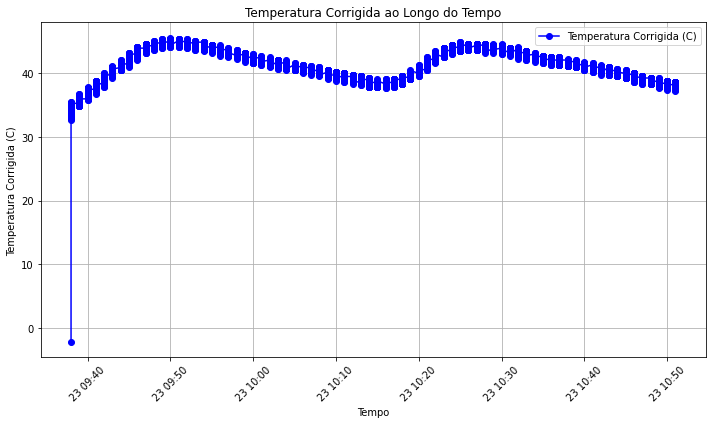

In [11]:
import matplotlib.pyplot as plt
import openpyxl
from datetime import datetime

# Nome do arquivo Excel
file_name = 'calibracao_dados_arduino.xlsx'

# Carrega o arquivo Excel
wb = openpyxl.load_workbook(file_name)
# Seleciona a aba mais recente (última aba)
ws = wb[wb.sheetnames[-1]]

# Listas para armazenar os dados
horas = []
temperaturas_corrigidas = []

# Percorre as linhas da aba, ignorando o cabeçalho
for row in ws.iter_rows(min_row=2, values_only=True):
    hora_str, _, temp_corrigida, _ = row  # Pegamos apenas a hora e a temperatura corrigida
    # Converte a string da hora para um objeto datetime
    hora = datetime.strptime(hora_str, '%Y-%m-%d %H:%M')
    # Adiciona os dados às listas
    horas.append(hora)
    temperaturas_corrigidas.append(float(temp_corrigida))

# Plota o gráfico
plt.figure(figsize=(10, 6))
plt.plot(horas, temperaturas_corrigidas, label='Temperatura Corrigida (C)', color='b', marker='o')

# Configurações do gráfico
plt.title('Temperatura Corrigida ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Temperatura Corrigida (C)')
plt.grid(True)
plt.legend()

# Rotaciona os rótulos do eixo X para melhorar a visualização
plt.xticks(rotation=45)
plt.tight_layout()

# Mostra o gráfico
plt.show()


In [ ]:
import serial
import time
from datetime import datetime
from openpyxl import Workbook, load_workbook

# Configura a porta serial e a taxa de transmissão
port = 'COM11'  # Substitua pela porta correta do seu Arduino
baud_rate = 9600

ser = None
file_name = 'calibracao_dados_arduino.xlsx'  # Nome do arquivo Excel

# Configurações do controle de temperatura
setpoint = 72.0  # Define o setpoint da temperatura
histerese = 2.0  # Define a faixa de histerese

def controla_resistencia(temperatura_corrigida):
    """
    Função para controlar a resistência baseado no setpoint e histerese.
    Se a temperatura corrigida for maior que o setpoint, desliga a resistência.
    Se a temperatura corrigida for menor que o setpoint, liga a resistência.
    """
    if temperatura_corrigida > setpoint + histerese:
        # Desliga a resistência se estiver acima do setpoint + histerese
        print("Desligando a resistência")
        # Aqui você adicionaria o código para desligar a resistência, por exemplo:
        # digitalWrite(RELE_RESISTENCIA, HIGH)  # ou outro comando para desligar
        return "Desligada"
    elif temperatura_corrigida < setpoint - histerese:
        # Liga a resistência se estiver abaixo do setpoint - histerese
        print("Ligando a resistência")
        # Aqui você adicionaria o código para ligar a resistência, por exemplo:
        # digitalWrite(RELE_RESISTENCIA, LOW)  # ou outro comando para ligar
        return "Ligada"
    else:
        # Caso esteja na faixa de histerese, mantém o estado atual
        print("Mantendo o estado atual da resistência")
        return "Mantida"

try:
    # Abre a conexão com a porta serial
    ser = serial.Serial(port, baud_rate)
    time.sleep(2)  # Espera o Arduino inicializar

    # Tenta carregar o arquivo Excel existente ou cria um novo
    try:
        wb = load_workbook(file_name)
        # Determina o próximo índice de aba
        sheet_index = len(wb.sheetnames) + 1
    except FileNotFoundError:
        wb = Workbook()
        sheet_index = 1

    # Cria uma nova aba para a rodada de teste atual
    sheet_name = f'Teste_{sheet_index}'
    ws = wb.create_sheet(title=sheet_name)
    
    # Cabeçalho para as colunas de Hora, Temperatura Bruta, Temperatura Corrigida, Temperatura Ambiente, Estado da Resistência
    ws.append(['Hora', 'Temperatura Bruta (C)', 'Temperatura Corrigida (C)', 'Temperatura Ambiente (C)', 'Estado da Resistência'])

    print(f"Conectado à porta {port}. Começando a coleta de dados...")

    while True:
        try:
            # Lê dados da porta serial
            line = ser.readline().decode('utf-8').strip()
            if line:
                # Supondo que a linha tenha este formato:
                # Temp. Bruta: 25.0 C, Temp. Corrigida: 20.0 C, Temp. Ambiente: 22.0 C
                if "Temp. Bruta" in line:
                    print(f"Recebido: {line}")
                    parts = line.split(',')
                    # Extrai as temperaturas
                    temp_bruta = parts[0].split(':')[1].strip().split()[0]  # Temperatura Bruta
                    temp_corrigida = float(parts[1].split(':')[1].strip().split()[0])  # Temperatura Corrigida
                    temp_ambiente = parts[2].split(':')[1].strip().split()[0]  # Temperatura Ambiente
                    
                    # Obtém a hora atual (sem segundos)
                    hora_atual = datetime.now().strftime('%H:%M')
                    
                    # Controla o estado da resistência com base na temperatura corrigida
                    estado_resistencia = controla_resistencia(temp_corrigida)
                    
                    # Escreve os dados na aba do arquivo Excel
                    ws.append([hora_atual, temp_bruta, temp_corrigida, temp_ambiente, estado_resistencia])
                    
                    # Exibe os dados no terminal
                    print(f"Hora: {hora_atual}, Temp Bruta: {temp_bruta} C, Temp Corrigida: {temp_corrigida} C, Temp Ambiente: {temp_ambiente} C, Estado da Resistência: {estado_resistencia}")
        except Exception as e:
            print(f"Erro ao ler dados: {e}")

except serial.SerialException as e:
    print(f"Erro ao abrir a porta serial: {e}")

finally:
    # Salva o arquivo Excel
    wb.save(file_name)
    if ser and ser.is_open:
        ser.close()


In [ ]:
import serial
import time
from datetime import datetime
from openpyxl import Workbook, load_workbook

# Configura a porta serial e a taxa de transmissão
port = 'COM11'  # Substitua pela porta correta do seu Arduino
baud_rate = 9600

ser = None
file_name = 'calibracao_dados_arduino.xlsx'  # Nome do arquivo Excel

# Configurações do controle de temperatura
setpoint = 72.0  # Define o setpoint da temperatura
histerese = 2.0  # Define a faixa de histerese

def verifica_setpoint(temperatura_corrigida):
    """
    Função para verificar o status do setpoint:
    Retorna:
    - Status do Setpoint: 'Não chegou ainda' ou 'Já passou'
    - Acionamento da Resistência: 1 (ligada) ou 0 (desligada)
    """
    if temperatura_corrigida < setpoint - histerese:
        return "Não chegou ainda", 1  # Resistência ligada (1) quando abaixo do setpoint
    elif temperatura_corrigida > setpoint + histerese:
        return "Já passou", 0  # Resistência desligada (0) quando acima do setpoint
    else:
        return "No Setpoint", 0  # Resistência desligada (0) quando dentro do setpoint

try:
    # Abre a conexão com a porta serial
    ser = serial.Serial(port, baud_rate)
    time.sleep(2)  # Espera o Arduino inicializar

    # Tenta carregar o arquivo Excel existente ou cria um novo
    try:
        wb = load_workbook(file_name)
        # Determina o próximo índice de aba
        sheet_index = len(wb.sheetnames) + 1
    except FileNotFoundError:
        wb = Workbook()
        sheet_index = 1

    # Cria uma nova aba para a rodada de teste atual
    sheet_name = f'Teste_{sheet_index}'
    ws = wb.create_sheet(title=sheet_name)
    
    # Cabeçalho para as colunas de Hora, Temperatura Bruta, Temperatura Corrigida, Temperatura Ambiente, Status do Setpoint, Acionamento da Resistência
    ws.append(['Hora', 'Temperatura Bruta (C)', 'Temperatura Corrigida (C)', 'Temperatura Ambiente (C)', 'Status do Setpoint', 'Acionamento da Resistência (1=Ligada, 0=Desligada)'])

    print(f"Conectado à porta {port}. Começando a coleta de dados...")

    while True:
        try:
            # Lê dados da porta serial
            line = ser.readline().decode('utf-8').strip()
            if line:
                # Supondo que a linha tenha este formato:
                # Temp. Bruta: 25.0 C, Temp. Corrigida: 20.0 C, Temp. Ambiente: 22.0 C
                if "Temp. Bruta" in line:
                    print(f"Recebido: {line}")
                    parts = line.split(',')
                    # Extrai as temperaturas
                    temp_bruta = parts[0].split(':')[1].strip().split()[0]  # Temperatura Bruta
                    temp_corrigida = float(parts[1].split(':')[1].strip().split()[0])  # Temperatura Corrigida
                    temp_ambiente = parts[2].split(':')[1].strip().split()[0]  # Temperatura Ambiente
                    
                    # Obtém a hora atual (sem segundos)
                    hora_atual = datetime.now().strftime('%H:%M')
                    
                    # Verifica o status do setpoint e o acionamento da resistência
                    status_setpoint, resistencia_status = verifica_setpoint(temp_corrigida)
                    
                    # Escreve os dados na aba do arquivo Excel
                    ws.append([hora_atual, temp_bruta, temp_corrigida, temp_ambiente, status_setpoint, resistencia_status])
                    
                    # Exibe os dados no terminal
                    print(f"Hora: {hora_atual}, Temp Bruta: {temp_bruta} C, Temp Corrigida: {temp_corrigida} C, Temp Ambiente: {temp_ambiente} C, Status: {status_setpoint}, Resistência: {resistencia_status}")
        except Exception as e:
            print(f"Erro ao ler dados: {e}")

except serial.SerialException as e:
    print(f"Erro ao abrir a porta serial: {e}")

finally:
    # Salva o arquivo Excel
    wb.save(file_name)
    if ser and ser.is_open:
        ser.close()
